# MTH448 Project 3

## What's in a name?

## Introduction

The U.S. Social Security Administration (SSA) has a large number of infant name records, which provide an excellent dataset for analyzing naming trends over time in various U.S. states. This project explores various aspects of infant name data, including: diversity, prevalence, genetic specificity, and historical trends, among many other components. We can apply natural analytic and computational methods.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

First, we must import two zip files: “names.zip” and “namesbystate.zip”. To access these two files, we must first import the special library. We can download the names data for everyone born in the United States from the NSA website. We can also find data for individual years or people in a data frame. We can try to create a data frame that contains all the data.

In [6]:
ls

448ExLec1.ipynb                      MTH448 Lecture 2.ipynb
A (1).dat                            MTH448 Lecture10.ipynb
Applications/                        MTH448 Project 1 .ipynb
BBall.csv                            MTH448 Project3.ipynb
C1_W3_Lab08_Overfitting_Soln.ipynb   MTH448 lecture 11.ipynb
C2_W1_Lab02_CoffeeRoasting_TF.ipynb  MTH448 lecture3 .ipynb
Class 2.ipynb                        MTH448 lecture9.ipynb
Class 3.ipynb                        MTH448 project2.ipynb
Desktop/                             MTH448Lec14.ipynb
Documents/                           MTH448Lec3.ipynb
Downloads/                           MTH448Lec4.ipynb
Dynamic 3.ipynb                      MTH448Lec5(Pro).ipynb
Dynamic change 1 .ipynb              MTH448Lec5.ipynb
Dynamic system 2.ipynb               MTH448Lec6.ipynb
Dynamic.ipynb                        MTH448Lec7Prelim.ipynb
Ex448Lec2.ipynb                      Mintty/
H-Rare-Disease-25/                   Movies/
IdeaProjects/                        Mth 

We need to open this file named "name" to filiter our data.

In [7]:
import glob
file_names = glob.glob("Desktop/names/yob*.txt")

In [8]:
file_names

['Desktop/names/yob2000.txt',
 'Desktop/names/yob2014.txt',
 'Desktop/names/yob1938.txt',
 'Desktop/names/yob1910.txt',
 'Desktop/names/yob1904.txt',
 'Desktop/names/yob1905.txt',
 'Desktop/names/yob1911.txt',
 'Desktop/names/yob1939.txt',
 'Desktop/names/yob2015.txt',
 'Desktop/names/yob2001.txt',
 'Desktop/names/yob2017.txt',
 'Desktop/names/yob2003.txt',
 'Desktop/names/yob1907.txt',
 'Desktop/names/yob1913.txt',
 'Desktop/names/yob1898.txt',
 'Desktop/names/yob1899.txt',
 'Desktop/names/yob1912.txt',
 'Desktop/names/yob1906.txt',
 'Desktop/names/yob2002.txt',
 'Desktop/names/yob2016.txt',
 'Desktop/names/yob2012.txt',
 'Desktop/names/yob2006.txt',
 'Desktop/names/yob1902.txt',
 'Desktop/names/yob1916.txt',
 'Desktop/names/yob1889.txt',
 'Desktop/names/yob1888.txt',
 'Desktop/names/yob1917.txt',
 'Desktop/names/yob1903.txt',
 'Desktop/names/yob2007.txt',
 'Desktop/names/yob2013.txt',
 'Desktop/names/yob2005.txt',
 'Desktop/names/yob2011.txt',
 'Desktop/names/yob1915.txt',
 'Desktop/

After reading the files, we will notice that the list of filenames is not in very good order.
We can try to create a list first and then use a loop to iterate through all the files and try to read the csv file.

In [20]:
frames = []   # Create a list
for f in file_names:   # Loop over all the files.
    frames.append(pd.read_csv(f,names=['Name','Sex','Count']))  #after looping, pcik "Name, sex, count" 

In [21]:
frames[0]

,Name,Sex,Count
0,Emily,F,25959
1,Hannah,F,23086
2,Madison,F,19968
3,Ashley,F,17998
4,Sarah,F,17713
...,...,...,...
29772,Zeph,M,5
29773,Zeven,M,5
29774,Ziggy,M,5
29775,Zo,M,5


After we got the list of DataFrames, we can cancatenate the list together into a single DataFrame by using "concat". 


In [22]:
NameDataFrame = pd.concat(frames)  # use "concate" to concatenate the list together

In [23]:
NameDataFrame

,Name,Sex,Count
0,Emily,F,25959
1,Hannah,F,23086
2,Madison,F,19968
3,Ashley,F,17998
4,Sarah,F,17713
...,...,...,...
32121,Zyheem,M,5
32122,Zykel,M,5
32123,Zyking,M,5
32124,Zyn,M,5


When we put all the lists side by side, we can see that the information in the name file becomes clear and regular. Once we're done organizing, we can pick the special “string” to find the information we're looking for. We can start with a simple example to understand what we need to do with “split”.

In [24]:
tw = 'Hello.world'
tw.split('.')    # use .split to split the whole string 

['Hello', 'world']

With output we can see that when we use “.” in the string, it automatically detects that the string has “.” in the string. So we can try to apply this to our file, because it's hard to capture the information you want when the query is too large, so creating a new list that loops your entire datafile can help you organize the information. 

So we can create a list in the same order as the dataframe by creating a list, which can have information about the year, month, or gender. 

In [25]:
years = []   # Create a list to strore the years as same as order of file
for f in file_names:     # Loop the file "names"
    FnameList = f.split('.')     # In order to get the accurate info about years, we will use the .split()
    year = int(FnameList[0][-4:])   # it slices the last four characters of the filename string
    years.append(year)   # after looping, append all the years to the list


In [26]:
years # print out the list of years

[2000,
 2014,
 1938,
 1910,
 1904,
 1905,
 1911,
 1939,
 2015,
 2001,
 2017,
 2003,
 1907,
 1913,
 1898,
 1899,
 1912,
 1906,
 2002,
 2016,
 2012,
 2006,
 1902,
 1916,
 1889,
 1888,
 1917,
 1903,
 2007,
 2013,
 2005,
 2011,
 1915,
 1901,
 1929,
 1928,
 1900,
 1914,
 2010,
 2004,
 1973,
 1967,
 1998,
 1999,
 1966,
 1972,
 1958,
 1964,
 1970,
 1971,
 1965,
 1959,
 1961,
 1975,
 1949,
 1948,
 1974,
 1960,
 1976,
 1962,
 1989,
 1988,
 1963,
 1977,
 1952,
 1946,
 1991,
 1985,
 1984,
 1990,
 1947,
 1953,
 1979,
 1945,
 1951,
 1986,
 1992,
 1993,
 1987,
 1950,
 1944,
 1978,
 1940,
 1954,
 1968,
 1983,
 1997,
 1996,
 1982,
 1969,
 1955,
 1941,
 1957,
 1943,
 1994,
 1980,
 1981,
 1995,
 1942,
 1956,
 2009,
 2021,
 1919,
 1931,
 1925,
 1886,
 1892,
 1893,
 1887,
 1924,
 1930,
 1918,
 2020,
 2008,
 2022,
 1926,
 1932,
 1891,
 1885,
 1884,
 1890,
 1933,
 1927,
 2023,
 1923,
 1937,
 1894,
 1880,
 1881,
 1895,
 1936,
 1922,
 2018,
 1934,
 1920,
 1908,
 1883,
 1897,
 1896,
 1882,
 1909,
 1921,
 1935,

By using the list of years, we can combine the years and data frames to get a more subjective view of the names, genders, and numbers for each year. This can help us explore the diversity of names, or the most popular names in different years, as well as what names are most used by girls and what names are most used by boys. In our report, we can look at different data to see the interesting variations in these names. We can also visualize the changes with graphs and charts. 

In [44]:
NameDataFrame = pd.concat(frames,keys=years)

In [45]:
NameDataFrame

Name Sex  Count
2000 0        Emily   F  25959
     1       Hannah   F  23086
     2      Madison   F  19968
     3       Ashley   F  17998
     4        Sarah   F  17713
...             ...  ..    ...
2019 32121   Zyheem   M      5
     32122    Zykel   M      5
     32123   Zyking   M      5
     32124      Zyn   M      5
     32125    Zyran   M      5

[2117219 rows x 3 columns]

Secondly, we have to load the state date we can create a function to load the state 
names data from multiple files into a Dataframe.

## 1. Name Diversity over the times/Years

The diversity of names is usually a reflection of the diversity of cultures, and usually many countries, especially the United States, as countries of immigration. Most groups come from countries with different backgrounds, and such diversity usually reflects different cultural histories. Often the biggest difference we can find in names is the ethnicity of the people, there is a big difference between the last names of Europe and North America and Asia and Africa. 

A classic joke is that usually people in Europe can tell what country or region they are from by their face or name, but they have a hard time telling what country or region an Asian is from. It is true that we can simply tell the difference between people who live in the same culture. But what's more interesting is that, despite this, we can tell a lot of differences in the last name. 

In [114]:
# Create a function to count the unique name
def count_unique_names_per_year(df):
    
    """Counts the number of unique names per year."""
    unique_names_perYear = df.groupby("year")["Name"].nunique()
    print("Unique Names Over Time:\n", unique_names_per_year.head())
    return unique_names_per_year

# Call the function
unique_names_perYear = count_unique_names_per_year(NameDataFrame)


Unique Names Over Time:
 year
1880    1889
1881    1829
1882    2012
1883    1962
1884    2158
Name: Name, dtype: int64


In [111]:
# Create a function to run the avarge number of babies per name each year
def compute_avg_babies_per_name(df):
    # Two variables one is for totalbabies and avarge number
    total_babies_per_year = df.groupby("year")["Count"].sum()
    avg_babies_per_name = total_babies_per_year / unique_names_per_year
    print("\Average Babies per Name Over Time:\n", avg_babies_per_name.head())
    return avg_babies_per_name

# Call the function to see the return 
avg_babies_per_name = compute_avg_babies_per_name(NameDataFrame)

\Average Babies per Name Over Time:
 year
1880    106.661726
1881    105.351558
1882    110.105865
1883    110.573394
1884    112.817887
dtype: float64


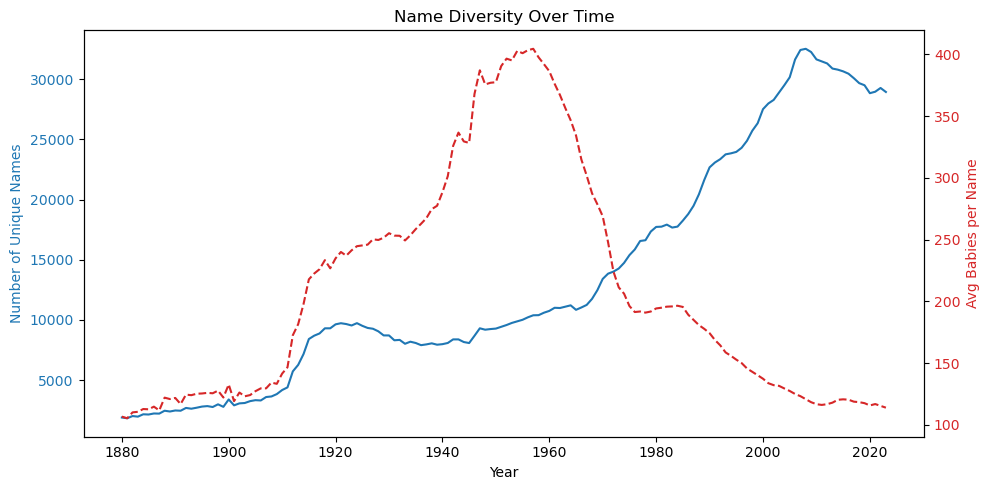

In [112]:
# Import the library to help us to understand the plot.
import matplotlib.pyplot as plt

def plot_name_diversity(unique_names, avg_babies):
    #Plots the number of unique names and average babies per name over time.
    fig, ax1 = plt.subplots(figsize=(10, 5))

    # Find for the unique name
    ax1.set_xlabel("Year")
    ax1.set_ylabel("Number of Unique Names", color="tab:blue")
    ax1.plot(unique_names, color="tab:blue", label="Unique Names")
    ax1.tick_params(axis="y", labelcolor="tab:blue")

    # Add second axis for avg babies per name
    ax2 = ax1.twinx()
    ax2.set_ylabel("Avg Babies per Name", color="tab:red")
    ax2.plot(avg_babies, color="tab:red", linestyle="dashed", label="Avg Babies per Name")
    ax2.tick_params(axis="y", labelcolor="tab:red")

    # Give the plot title and legend
    plt.title("Name Diversity Over Time")
    fig.tight_layout()
    plt.show()

# Call the function with two paramters
plot_name_diversity(unique_names_per_year, avg_babies_per_name)


So we can categorize as well as plot our database to see changes based on filtering by name and year. For example, in Asia, different countries have different languages and pronunciations of words, which makes the names very easy to categorize.

## 2. Most Popular Names Over Time/ Years

Exploring the most popular names has always been an interesting point as every year different states have a different name that becomes popular every year. There are even times when one of your classes may have repeat names. It's really all based on personal preference as well as parental choice. Many people prefer to choose the names that are popular today, thus producing a lot of classmates with the same first name. Others are more inclined to avoid going for the trendy, so they choose more unique names. Today in this report we get to explore the most popular names of the moment in different years.

Because we need to search and categorize through two databases, we have a very large database. So we can find the corresponding data through different partitions, which can help us to sort better. First we can use 'sort' function to sort.

In [46]:
NameDataFrame = pd.concat(frames,keys=years)

In [47]:
NameDataFrame

Name Sex  Count
2000 0        Emily   F  25959
     1       Hannah   F  23086
     2      Madison   F  19968
     3       Ashley   F  17998
     4        Sarah   F  17713
...             ...  ..    ...
2019 32121   Zyheem   M      5
     32122    Zykel   M      5
     32123   Zyking   M      5
     32124      Zyn   M      5
     32125    Zyran   M      5

[2117219 rows x 3 columns]

As you can see from our output, each year will have a corresponding name and number of people. And we're going to try to change year in the name of the file, or sorting to make it clearer that we're organizing the name file.

In [48]:
NameDataFrame = NameDataFrame.reset_index()

In [49]:
NameDataFrame

,level_0,level_1,Name,Sex,Count
0,2000,0,Emily,F,25959
1,2000,1,Hannah,F,23086
2,2000,2,Madison,F,19968
3,2000,3,Ashley,F,17998
4,2000,4,Sarah,F,17713
...,...,...,...,...,...
2117214,2019,32121,Zyheem,M,5
2117215,2019,32122,Zykel,M,5
2117216,2019,32123,Zyking,M,5
2117217,2019,32124,Zyn,M,5


In [51]:
NameDataFrame = NameDataFrame.rename({'level_0':'year'},axis=1)

In [52]:
NameDataFrame

,year,level_1,Name,Sex,Count
0,2000,0,Emily,F,25959
1,2000,1,Hannah,F,23086
2,2000,2,Madison,F,19968
3,2000,3,Ashley,F,17998
4,2000,4,Sarah,F,17713
...,...,...,...,...,...
2117214,2019,32121,Zyheem,M,5
2117215,2019,32122,Zykel,M,5
2117216,2019,32123,Zyking,M,5
2117217,2019,32124,Zyn,M,5


In [53]:
NameDataFrame = NameDataFrame.sort_values(by=['year','Count'])

In [54]:
NameDataFrame

,year,level_1,Name,Sex,Count
1968649,1880,835,Adelle,F,5
1968650,1880,836,Adina,F,5
1968651,1880,837,Adrienne,F,5
1968652,1880,838,Albertine,F,5
1968653,1880,839,Alys,F,5
...,...,...,...,...,...
1913599,2023,1,Emma,F,13527
1931133,2023,17535,Oliver,M,14741
1913598,2023,0,Olivia,F,15270
1931132,2023,17534,Noah,M,18995


## 3. Sex Specificity of Names

Gender specificity can also be distinguished by name. Many times when we see a person's name we probably have nearly an 80% chance of recognizing whether the name is a girl or a boy. Even though there are times when the names of boys and girls are confused, it is still a minority. 

Hence, we can pick what we compute a dataframe that lists the number of femal babies names" olivia" for each year. We also can choose the different years to observe the name chages in differnt years. For example, we can observe the 2003 and 2007 year.

If we want to identify the special gender and year, the best way is we use "groupby". It is pretty helpful for us to filter the data from the big file.

In [56]:
NameSex = NameDataFrame.groupby(['Sex','Name']) # we use the groupby "sex" and "name"
Olivias = NameSex.get_group(('F','Olivia'))     # assign the group with specifc "F" and "Olivia"
Olivias = Olivias.set_index('year')            # assign the Olivias to two different years 2003 and 2007
display(Olivias)

,level_1,Name,Sex,Count
year,,,,
1880,234,Olivia,F,44
1881,214,Olivia,F,51
1882,239,Olivia,F,52
1883,267,Olivia,F,46
1884,266,Olivia,F,54
...,...,...,...,...
2019,0,Olivia,F,18561
2020,0,Olivia,F,17677
2021,0,Olivia,F,17824


In [57]:
print("Olivias in 2003: ",Olivias.loc[2003,'Count'])
print("Olivias in 2007: ",Olivias.loc[2007,'Count'])

Olivias in 2003:  16152
Olivias in 2007:  16587


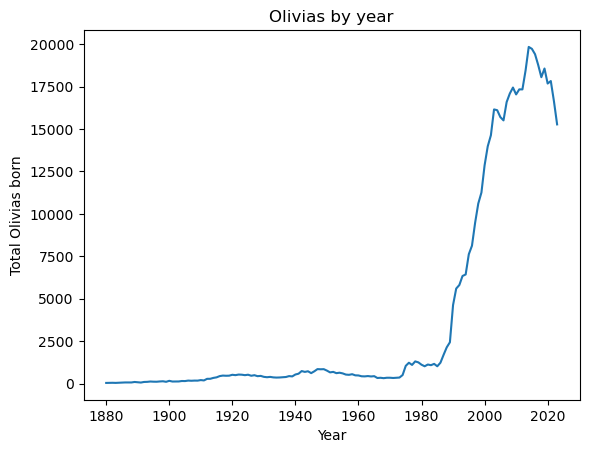

In [58]:
# And we also can create a plot toshow the Olivias by year:
plt.plot(Olivias.index,Olivias['Count'])     # create a plot to count the year and number of "Olivia"
plt.title('Olivias by year')                # assign the plot title 
plt.xlabel('Year')                           # assign the x-coordinate for "year"
plt.ylabel('Total Olivias born')              # assign the y-coordinate for How many Olivia born 
plt.show()

Through the responses in the charts we can see that between 1880 and 1980, the usage of the name Olivia was very low. But after 1980, this name Olivia got a significant boost and even reached the peak of the name is usage during 2019-2020. We can see that in 2003, there were 16,152 girls with this name, and in 2007, there were 16,587 girls with this name. The difference between the data is also reflected in the plots compared to the middle and lower.

### 2.2 Sex Specificity and diversity

At the same time we can actually explore yo some of the names that will again be male and female. Like for example special cases of names that were once masculine/feminine and later chose to be transgender. Some of these name variations can vary greatly in gender distribution from year to year. For example, Jordan and Taylor may have been male names in the past, but as society and time change, women have also been known to use these names.

So we can try to calculate the percentage change in name gender from year to year of a name, and we can use the percentage to filter out names that have changed significantly.

In [89]:
gender_trend = NameDataFrame.groupby(["Name", "year", "Sex"])["Count"].sum().unstack()
gender_trend.fillna(0, inplace=True)

gender_trend["total"] = gender_trend["F"] + gender_trend["M"]
gender_trend["male_ratio"] = gender_trend["M"] / gender_trend["total"]

At first, we utilize "groupby" to filter the data by "Name", "Sex" and "Year".
Then we can calculate the two total number of both gender and through the matio to get the ratio of gender trend.

In [90]:
changing_names = gender_trend.groupby("Name")["male_ratio"].std().sort_values(ascending=False).head(10)
print("Gender Most Changes Name:\n", changing_names)

Gender Most Changes Name:
 Name
Altonia     0.707107
Jazire      0.707107
Ahanna      0.707107
Mccarty     0.707107
Ahari       0.707107
Wrennyn     0.707107
Merce       0.707107
Rhode       0.707107
Clellie     0.707107
Mathison    0.707107
Name: male_ratio, dtype: float64


## 4. Name History 

In [79]:
def plot_name_trend(name, sex):
    """
    Let us plots the historical trend of a given name for a specified sex.
    two paramter the first one is be name, second one is sex
    :param name: The name to analyze.
    :param sex: 'M' for male, 'F' for female.
    """
    name_trend = NameDataFrame[(NameDataFrame['Name'] == name) & (NameDataFrame['Sex'] == sex)]
    
    if name_trend.empty:
        print(f"No data found for {name} with sex {sex}.")
        return
    
    plt.figure(figsize=(10, 5)) # we can try to plot the size 
    plt.plot(name_trend['year'], name_trend['Count'], marker='o', linestyle='-')
    plt.xlabel('Year')
    plt.ylabel('Count')
    plt.title(f'Popularity of the name "{name}" over time')
    plt.grid(True)
    plt.show()

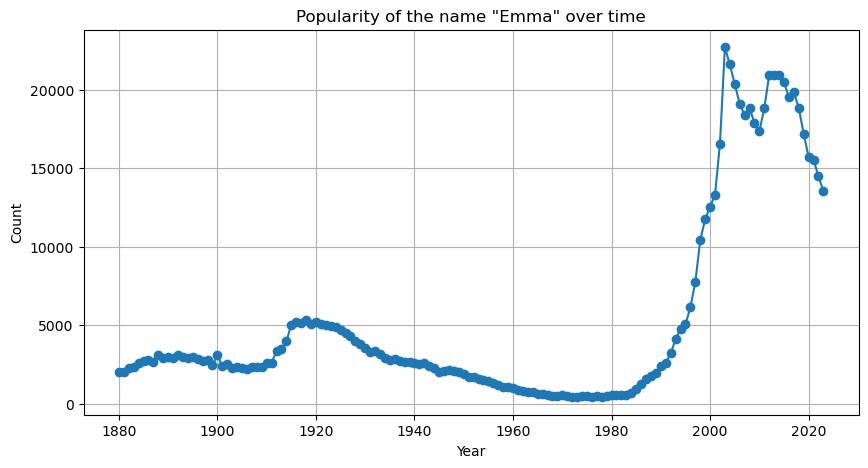

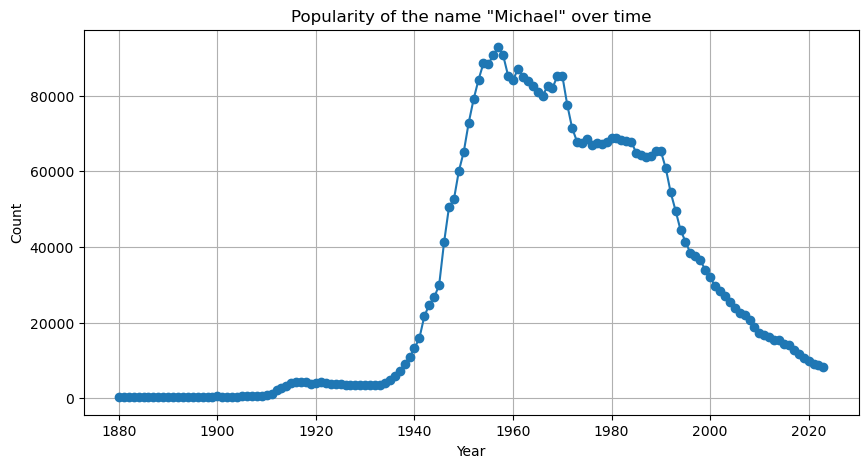

In [80]:
# Example usage
plot_name_trend('Emma', 'F')
plot_name_trend('Michael', 'M')

Let's look at “Emma” and “Michael” through two different genders, and by filtering the data, we can see how the curves change. We can see if the name “Emma” is for girls, the earliest time this name has been used. We can also see the earliest usage time for the name “Michael” if it's a boy. We can visualize the number of uses of the name in different years by looking at the variation of the curve.

Of course we can also stretch to explore the history of names, such as what names can be consistently popular what names were briefly popular but then disappeared. Because there are many times when the main character in a movie or a popular novel will bring a name to fruition like Britney. But a short-lived fervor is likely to last only a short time. But there are a lot of names that can be very long-lasting and even popular for hundreds of years. You can also see these names popping up in celebrities. Whisper it, I think the names I've come across the most are “Michael” and “Peter”...

Therefore, we can first get which names have the highest count number by counting the number of occurrences of each name and finding the corresponding time year. The span over which each name occurs is derived from maximum year - minimum year. Then we can filter it to find out. Which names have been around the longest, and which names were only briefly popular.

In [81]:
name_lifespan = NameDataFrame.groupby("Name")["year"].agg(["min", "max"])  # Use “groupby" to filter the data of year
name_lifespan["lifespan"] = name_lifespan["max"] - name_lifespan["min"]

In [82]:
# Then we should create two variables, one is the longest lived time, one is for the shorest lived names.
Longest_livedNames = name_lifespan.sort_values("lifespan", ascending=False).head(10)
Shortest_livedNames = name_lifespan.sort_values("lifespan", ascending=True).head(10)

In [85]:
print("Keep Popular Name:\n", Longest_livedNames)
print("Short Term Name:\n", Shortest_livedNames)

Keep Popular Name:
            min   max  lifespan
Name                          
Mace      1880  2023       143
Harley    1880  2023       143
Tilden    1880  2023       143
Debbie    1880  2023       143
Nick      1880  2023       143
Gene      1880  2023       143
Roseanna  1880  2023       143
Tillie    1880  2023       143
Tillman   1880  2023       143
Louella   1880  2023       143
Short Term Name:
             min   max  lifespan
Name                           
Shaqir     2018  2018         0
Dyanira    1993  1993         0
Jesssica   1986  1986         0
Jessten    1996  1996         0
Jahmyia    2006  2006         0
Caleob     1998  1998         0
Starleana  1991  1991         0
Dyego      2007  2007         0
Starlisa   1980  1980         0
Calet      2020  2020         0


By organizing we can see that some of the names have a very long existence, while at the same time they are names that I have surprisingly rarely seen before. This is a side note to show that the frequency of repetition of a name does not mean that the name has been around for a long time. Names have always been very random and creative, and some names even have special meanings.

# Conclusion

In this report, we have explored the ideas of name file. We explore the name file through four different aspects：Name Diversity over the times/Years，Most Popular Names Over Time/ Years， Sex Specificity of Names and Name history.
* Over time, the number of unique names given to babies each year has increased. Through ourplot and analysis we can observe the most popular names and the short-lived popular names each year. Many times movies as well as novels have the potential to make a name very popular. This trend could be influenced by cultureal shifts, greater global influences, and a desire of uniqueness in naming. 

* The gender diversity we can also observe leads to the same name variations.

#### Future Directions:

  For the further studies, we could try to explor gender-specific nameing. Or how major historical evernts impact baby name choices. 
For example: wars, economic shifts.Futhermore, we also can analyzing short-lived vs popular names could provide more insights into namming cycles over generation.